In [18]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('D:\\nettech\\house.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Taking area, bedrooms, bathrooms, stories, parking, basement, mainroad, airconditioning as X - independent variables
# Price is the dependent variable (value which we are going to predict)

In [4]:
df = df.iloc[:,:7]
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom
0,13300000,7420,4,2,3,yes,no
1,12250000,8960,4,4,4,yes,no
2,12250000,9960,3,2,2,yes,no
3,12215000,7500,4,2,2,yes,no
4,11410000,7420,4,1,2,yes,yes
...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no
541,1767150,2400,3,1,1,no,no
542,1750000,3620,2,1,1,yes,no
543,1750000,2910,3,1,1,no,no


In [5]:
# encoding yes and no values to 1/0
# as we have binary values in both of the columns we will use LabelEncoder

# example encoding with One Hot Encoder
#dfencode = pd.get_dummies(df.iloc[:,5:7])
#dfencode

In [6]:
# encoding yes and no values to 1/0
# as we have binary values in both of the columns we will use LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df.mainroad = le.fit_transform(df.mainroad)
df.guestroom = le.fit_transform(df.guestroom)

In [8]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom
0,13300000,7420,4,2,3,1,0
1,12250000,8960,4,4,4,1,0
2,12250000,9960,3,2,2,1,0
3,12215000,7500,4,2,2,1,0
4,11410000,7420,4,1,2,1,1
...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0
541,1767150,2400,3,1,1,0,0
542,1750000,3620,2,1,1,1,0
543,1750000,2910,3,1,1,0,0


In [9]:
X = df.iloc[:,1:]
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom
0,7420,4,2,3,1,0
1,8960,4,4,4,1,0
2,9960,3,2,2,1,0
3,7500,4,2,2,1,0
4,7420,4,1,2,1,1
...,...,...,...,...,...,...
540,3000,2,1,1,1,0
541,2400,3,1,1,0,0
542,3620,2,1,1,1,0
543,2910,3,1,1,0,0


In [10]:
y = df.price
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [11]:
lr = LinearRegression()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 19)

In [22]:
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
print('Mean Squared Error : ',mse)
print('R2 Score : ',r2)

Mean Squared Error :  1339929355435.1865
R2 Score :  0.6110131933183824


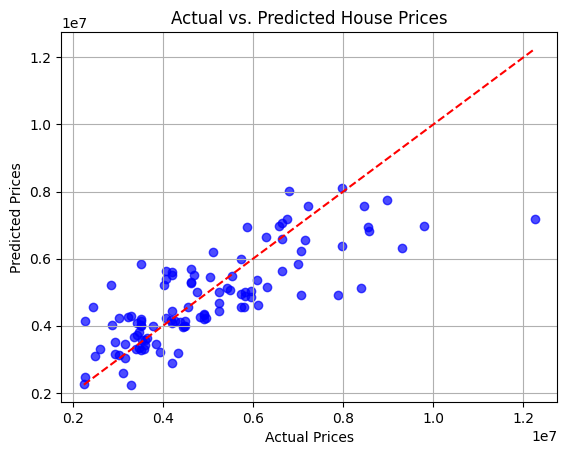

In [26]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Regression Line')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.grid(True)

In [40]:
def predictions(args):
    global ans
    ans = lr.predict(args)
    return float(ans)

In [32]:
print("Enter property details for price prediction:")
area = float(input("Area (in square feet): "))
bedrooms = int(input("Number of bedrooms: "))
bathrooms = int(input("Number of bathrooms: "))
stories = int(input("Number of stories: "))
mainroad = int(input("connected to mainroad: "))
guestroom = int(input("has guestrooms: "))

Enter property details for price prediction:
Area (in square feet): 9960
Number of bedrooms: 3
Number of bathrooms: 2
Number of stories: 2
connected to mainroad: 1
has guestrooms: 0


In [49]:
# The unit of currency is unknown in this dataset
user_input = [[area,bedrooms,bathrooms,stories,mainroad,guestroom]]
print(f'The cost of the property is : {predictions(user_input):.2f}')

The cost of the property is : 7165936.49


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
